In [1]:
import numpy as np
def boolean_matrix_multiplication(A, B):
    # Применяем логическое умножение строк и столбцов матриц с помощью операций AND и OR
    return np.logical_and.reduce(A[:, :, np.newaxis] | B[np.newaxis, :, :], axis=1)

# Пример использования
A = np.array([[0, 0], [0, 1]])
B = np.array([[1, 0], [1, 0]])
C = boolean_matrix_multiplication(A, B)
print(C)

[[ True False]
 [ True False]]


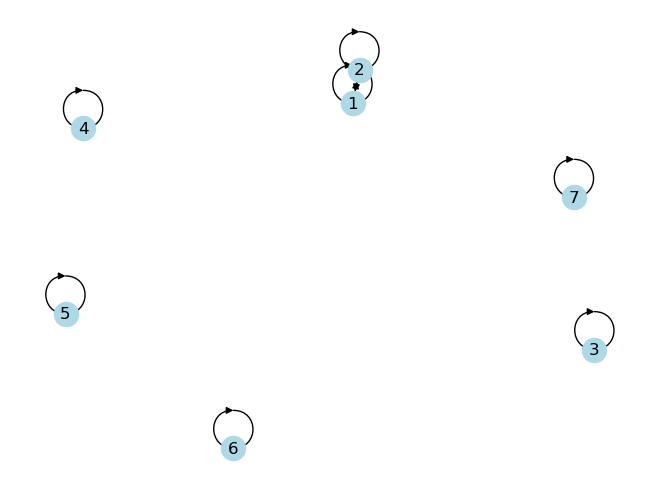

[[1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
<Compressed Sparse Row sparse array of dtype 'float64'
	with 9 stored elements and shape (7, 7)>
  Coords	Values
  (0, 0)	1.0
  (0, 1)	1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
[[ 0.  1. inf inf inf inf inf]
 [ 1.  0. inf inf inf inf inf]
 [inf inf  0. inf inf inf inf]
 [inf inf inf  0. inf inf inf]
 [inf inf inf inf  0. inf inf]
 [inf inf inf inf inf  0. inf]
 [inf inf inf inf inf inf  0.]]
[[-9999     0 -9999 -9999 -9999 -9999 -9999]
 [    1 -9999 -9999 -9999 -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999]
 [-9999 -9999 -9999 -9999 -9999 -9999 -9999]]


In [2]:
from scipy.sparse import csr_array
from scipy.sparse.csgraph import floyd_warshall
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    # Создание графа
    #G = nx.Graph() #не ориентированный
    G=nx.DiGraph(directed=True) # ориентированный

    # Добавление вершин, т.е. задание множества A для прямого произведения A*A
    G.add_nodes_from([1, 2, 3, 4, 5,6,7])
    # Добавление рёбер, то есть задание бинарного отношения, т.е. подмножества A*A
    A=[(1,2),(2,1),(1,1),(2,2),(3,3),(4,4),(5,5),(6,6),(7,7)]

    G.add_edges_from(A)

    # Визуализация графа
    nx.draw(G, with_labels=True, node_color='lightblue')
    plt.show()

    #Нахождение матрицы смежности B по бинарному отношению
    n=7#задание числа вершин графа
    B = np.zeros((n, n))

    for t in A:
        B[t[0]-1][t[1]-1]=1
    #матрица смежности графа по заданному бинарному отношению
    print(B)

    graph = B
    graph = csr_array(graph)
    print(graph)

    dist_matrix, predecessors = floyd_warshall(csgraph=graph, directed=True, return_predecessors=True)
    print(dist_matrix) # Матрица расстояний N x N между узлами графа. dist_matrix[i,j] задает кратчайшее расстояние от точки i до точки j на графе
    print(predecessors)

In [3]:
def get_matrix():
    return B